In [18]:
import pandas as pd
import numpy as np
from transformers import pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [20]:
df = pd.read_csv('/content/sample_data/data.csv', encoding='latin-1', header=None) # This dataset has no header
df.columns = ['Sentiment', 'Headline'] # Name the columns
print("Dataset shape:", df.shape)
print("\nFirst 5 entries:")
print(df.head())

Dataset shape: (5843, 2)

First 5 entries:
                                           Sentiment   Headline
0                                           Sentence  Sentiment
1  The GeoSolutions technology will leverage Bene...   positive
2  $ESI on lows, down $1.50 to $2.50 BK a real po...   negative
3  For the last quarter of 2010 , Componenta 's n...   positive
4  According to the Finnish-Russian Chamber of Co...    neutral


In [21]:
print("\nSentiment Distribution:")
print(df['Sentiment'].value_counts())


Sentiment Distribution:
Sentiment
Pretax loss totalled EUR 162.3 mn compared to a profit of EUR 253.5 mn in 2007 .                                                                                            2
The repurchases shall decrease the distributable capital and reserves .                                                                                                     2
L&T 's net profit for the whole 2010 dropped to EUR 36 million from EUR 45 million for 2009 .                                                                               2
Profit before taxes decreased to EUR 31.6 mn from EUR 50.0 mn the year before .                                                                                             2
Finnish automation solutions developer Cencorp Corporation ( OMX Helsinki : CNC1V ) issued on Thursday ( 18 September ) a profit warning for the third quarter of 2008 .    2
                                                                                               

In [22]:
print("\nLoading pre-trained model...")
classifier = pipeline(
    "sentiment-analysis",
    model="mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis",
    tokenizer="mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis"
)
print("Model loaded successfully!")


Loading pre-trained model...


Device set to use cpu


Model loaded successfully!


In [23]:
def get_sentiment(text):
    """
    This function takes a text string and returns the sentiment label and score.
    """
    try:
        result = classifier(text)[0]
        return result['label'], result['score']
    except:
        return "Error", 0.0

In [24]:
sample_df = df.sample(n=100, random_state=42).copy()
print(f"\nAnalyzing sentiment for {len(sample_df)} headlines...")


Analyzing sentiment for 100 headlines...


In [25]:
results = sample_df['Headline'].apply(get_sentiment)
sample_df[['Predicted_Sentiment', 'Confidence']] = pd.DataFrame(results.tolist(), index=sample_df.index)

In [26]:
print("\nSample Results with Prediction:")
print(sample_df[['Headline', 'Sentiment', 'Predicted_Sentiment', 'Confidence']].head(10))



Sample Results with Prediction:
      Headline                                          Sentiment  \
2900   neutral  In future , the plant will focus on the produc...   
351    neutral  The company said production volumes so far ind...   
994   positive  The company 's consolidated operating profit a...   
3612   neutral  According to its notice , Skandinaviska Enskil...   
2763   neutral  Aldata Solution Oyj Stock Exchange Release 11 ...   
4725   neutral  The Finnish company previously said its operat...   
4787  positive  Added long at friday close  $SPY $LABU $BLUE $...   
4586   neutral  The business has sales of about ( Euro ) 35 mi...   
3237  positive  `` With this agreement , we can continue our g...   
408    neutral  It inspects the companys strategic strengths a...   

     Predicted_Sentiment  Confidence  
2900             neutral    0.999857  
351              neutral    0.999857  
994              neutral    0.999829  
3612             neutral    0.999857  
2763        

Text(0, 0.5, 'Count')

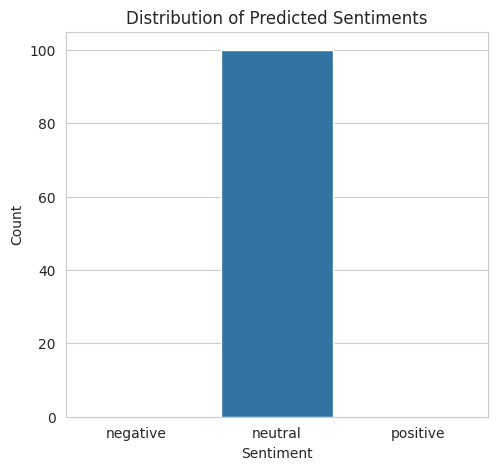

In [27]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=sample_df['Predicted_Sentiment'], order=['negative', 'neutral', 'positive'])
plt.title('Distribution of Predicted Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')

(0.7, 1.0)

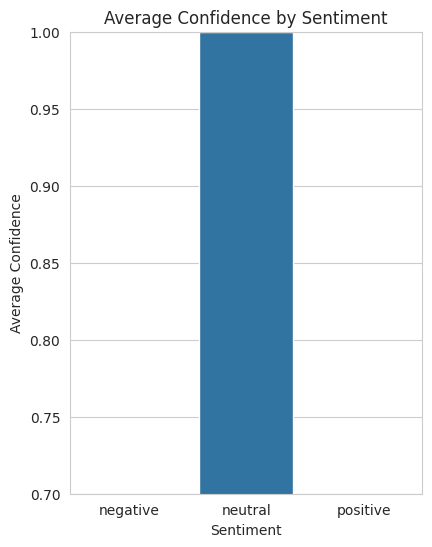

In [28]:
plt.subplot(1, 2, 2)
confidence_by_sentiment = sample_df.groupby('Predicted_Sentiment')['Confidence'].mean().reset_index()
sns.barplot(x='Predicted_Sentiment', y='Confidence', data=confidence_by_sentiment, order=['negative', 'neutral', 'positive'])
plt.title('Average Confidence by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Confidence')
plt.ylim(0.7, 1)

In [29]:
plt.tight_layout()
plt.savefig('sentiment_analysis_results.png')
plt.show()


<Figure size 1000x600 with 0 Axes>

In [30]:
sample_df.to_csv('financial_news_sentiment_predictions.csv', index=False)
print("\nAnalysis complete! Results saved to 'financial_news_sentiment_predictions.csv'")


Analysis complete! Results saved to 'financial_news_sentiment_predictions.csv'
